In [1332]:
#!pip install imblearn --user  
#uncomment below only if imblearn is not installed 

#restart Jupyter engine again is still fails to import imblearn

In [1333]:
# Importing the required libraries
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import operator
import pprint

from imblearn.over_sampling import SMOTE 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

In [1334]:
data = pd.read_csv("telecom_churn_data.csv", sep=',', encoding='ISO-8859-1')

In [1335]:
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [1336]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
mobile_number               int64
circle_id                   int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6        object
last_date_of_month_7        object
last_date_of_month_8        object
last_date_of_month_9        object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float6

In [1337]:
def gridSearchForLR(LRModel,X_train,y_train):
    grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
    logreg_cv=GridSearchCV(LRModel,grid,cv=10)
    logreg_cv.fit(X_train, y_train)

    print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
    print("accuracy :",logreg_cv.best_score_)

In [1338]:
def impFeaturesforModels(importance):
    importancePerFeature = sorted(dict(zip(X_train.columns, importance)).items(),key=operator.itemgetter(1),reverse=True)
    pprint.pprint(importancePerFeature, width=1)
    #print(importancePerFeature)

In [1339]:
#function to get confusion metric parameters printed

def printingConfusionMetricDetails(confusion_metric):
    TP = confusion_metric[1,1] # true positive 
    TN = confusion_metric[0,0] # true negatives
    FP = confusion_metric[0,1] # false positives
    FN = confusion_metric[1,0] # false negatives


    print('Acuracy Score', accuracy_score(y_test,y_pred_default))
    print('Sensitivity: ', TP / float(TP+FN))
    print('Specificity: ',TN / float(TN+FP))
    print('false postive rate: ',FP/ float(TN+FP))
    print('positive predictive value: ', TP / float(TP+FP))
    print('Negative predictive value: ',TN / float(TN+ FN))
    print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))


In [1340]:
#function to print Mean Sq Error and R2
def printingMSEandRsquare(y_test, y_pred):
    mean_square_err = mean_squared_error(y_test, y_pred)
    r_square = r2_score(y_test, y_pred)
    print(mean_square_err)
    print(r_square)

In [1341]:
data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


In [1342]:
#drop mobile number  - the number is not needed for any calculation or analysis
data.drop('mobile_number',axis=1,inplace=True)

In [1343]:
#check for missing values
data.isna().sum()

circle_id                  0
loc_og_t2o_mou          1018
std_og_t2o_mou          1018
loc_ic_t2o_mou          1018
last_date_of_month_6       0
                        ... 
aon                        0
aug_vbc_3g                 0
jul_vbc_3g                 0
jun_vbc_3g                 0
sep_vbc_3g                 0
Length: 225, dtype: int64

In [1344]:
#Missing value percencentages
missing_values = pd.DataFrame((data.isnull().sum()/len(data))*100).reset_index().rename(columns = {'index': 'feature', 0: 'Missing%'}).sort_values('Missing%',ascending = False)
missing_values

,feature,Missing%
188,arpu_3g_6,74.846748
176,av_rech_amt_data_6,74.846748
216,fb_user_6,74.846748
196,night_pck_user_6,74.846748
160,total_rech_data_6,74.846748
...,...,...
145,max_rech_amt_7,0.000000
144,max_rech_amt_6,0.000000
143,total_rech_amt_9,0.000000
142,total_rech_amt_8,0.000000


In [1345]:
#Dropping columns where null are more than 95%
data=data.loc[:, data.isnull().mean() < .95]
# 1 column dropped

In [1346]:
#DATA IMPUTATION
#We can also use MICE imputation 
#data imputation for categorical columns (fb and nigh pack users) as -1
data=data.fillna({'fb_user_6':-1,'fb_user_7':-1,'fb_user_8':-1})
data=data.fillna({'night_pck_user_6':-1,'night_pck_user_7':-1,'night_pck_user_8':-1})
#data imputation for non categorical as 0 which means no recharge happened
data=data.fillna(0)

In [1347]:
#verifying imputation and null
data.isna().sum()

circle_id               0
loc_og_t2o_mou          0
std_og_t2o_mou          0
loc_ic_t2o_mou          0
last_date_of_month_6    0
                       ..
aon                     0
aug_vbc_3g              0
jul_vbc_3g              0
jun_vbc_3g              0
sep_vbc_3g              0
Length: 225, dtype: int64

In [1348]:
#Missing value percencentages
missing_values = pd.DataFrame((data.isnull().sum()/len(data))*100).reset_index().rename(columns = {'index': 'feature', 0: 'Missing%'}).sort_values('Missing%',ascending = False)
missing_values

,feature,Missing%
0,circle_id,0.0
113,std_ic_t2o_mou_7,0.0
143,total_rech_amt_9,0.0
144,max_rech_amt_6,0.0
145,max_rech_amt_7,0.0
...,...,...
79,og_others_9,0.0
80,total_og_mou_6,0.0
81,total_og_mou_7,0.0
82,total_og_mou_8,0.0


In [1349]:
## No missing values now 
##Renaming columns to get them inline with month codes
data =data.rename(columns={'jun_vbc_3g': 'vbc_3g_6', 'jul_vbc_3g': 'vbc_3g_7',
                           'aug_vbc_3g': 'vbc_3g_8','sep_vbc_3g': 'vbc_3g_9'})

In [1350]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 225 columns):
circle_id                   int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6        object
last_date_of_month_7        object
last_date_of_month_8        object
last_date_of_month_9        object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float64
roam_og_mou_6               floa

In [1351]:
#data.describe()
data.shape

(99999, 225)

In [1352]:
#Deriving Features - 
data['amt_data_6'] = data.total_rech_amt_6 + data.total_rech_data_6           
data['amt_data_7'] = data.total_rech_amt_7 + data.total_rech_data_7
data['amt_data_8'] = data.total_rech_amt_8 + data.total_rech_data_8

#  average recharge by customer in June and July
data['avg_amt_data_6_7'] = (data.amt_data_6 + data.amt_data_7)/2

#Retaining customers whose recharge amount is >= 70th percentile amount

data_filtered = data.loc[data.avg_amt_data_6_7 >= data.avg_amt_data_6_7.quantile(0.7), :]
data_filtered = data_filtered.reset_index(drop=True)
data_filtered.shape

(30019, 229)

In [1353]:
data_filtered["last_date_of_month_6"] = pd.to_datetime(data_filtered["last_date_of_month_6"])
data_filtered["last_date_of_month_7"] = pd.to_datetime(data_filtered["last_date_of_month_7"])
data_filtered["last_date_of_month_8"] = pd.to_datetime(data_filtered["last_date_of_month_8"])
data_filtered["date_of_last_rech_6"] = pd.to_datetime(data_filtered["date_of_last_rech_6"])
data_filtered["date_of_last_rech_7"] = pd.to_datetime(data_filtered["date_of_last_rech_7"])
data_filtered["date_of_last_rech_8"] = pd.to_datetime(data_filtered["date_of_last_rech_8"])

#3 new columns for days since recharge.
data_filtered["days_since_recharge_6"] = data_filtered["last_date_of_month_6"] - data_filtered["date_of_last_rech_6"]
data_filtered["days_since_recharge_7"] = data_filtered["last_date_of_month_7"] - data_filtered["date_of_last_rech_7"]
data_filtered["days_since_recharge_8"] = data_filtered["last_date_of_month_8"] - data_filtered["date_of_last_rech_8"]

#converting into days
data_filtered["days_since_recharge_6"] = data_filtered["days_since_recharge_6"].dt.days
data_filtered["days_since_recharge_7"] = data_filtered["days_since_recharge_7"].dt.days
data_filtered["days_since_recharge_8"] = data_filtered["days_since_recharge_8"].dt.days

date_columns_to_be_dropped = ["last_date_of_month_6","last_date_of_month_7","last_date_of_month_8", 
                              "date_of_last_rech_6", "date_of_last_rech_7", "date_of_last_rech_8",
                              "date_of_last_rech_data_6","date_of_last_rech_data_7","date_of_last_rech_data_8"]
data_filtered = data_filtered.drop(columns=date_columns_to_be_dropped)
data_filtered.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30019 entries, 0 to 30018
Data columns (total 223 columns):
circle_id                   int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_9        object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float64
roam_og_mou_6               float64
roam_og_mou_7               float64
roam_og_mou_8               float64
roam_og_mou_9               f

In [1354]:
data_filtered.shape
#before outlier

(30019, 223)

In [1355]:
# HANDLING OUTLIERS
#z_scores = stats.zscore(data_filtered)

#abs_z_scores = np.abs(z_scores)
#filtered_entries = (abs_z_scores < 3).all(axis=1)
#data_filtered = data_filtered[filtered_entries]

#Using Quantile method ##method is removing all churn_flag=1 rows
Q1 = data_filtered.quantile(0.1)
Q3 = data_filtered.quantile(0.9)
IQR = Q3 - Q1

#data_filtered = data_filtered[~((data_filtered < (Q1 - 1.5 * IQR)) |(data_filtered > (Q3 + 1.5 * IQR))).any(axis=1)]
#data_filtered.info(verbose=True)

In [1356]:
data_filtered.shape
#after outlier treatment

(30019, 223)

In [1357]:
#Identifying Churn customers
data_filtered['churn_flag'] = np.where(((data_filtered['total_ic_mou_9'] == 0.00) | (data_filtered['total_og_mou_9'] == 0.00))
                            & ((data_filtered['vol_2g_mb_9'] == 0.00) | (data_filtered['vol_3g_mb_9'] == 0.00))
                            , 1, 0)
print(data_filtered['churn_flag'].value_counts())


0    26973
1     3046
Name: churn_flag, dtype: int64


In [1358]:
#CONSOLIDATION OF OTHER VALUES IS NEEDED 

In [1359]:
#now that every column follows same naming patter drop features related to Churn Phase
data_filtered = data_filtered.drop(data_filtered.filter(regex='_9', axis = 1).columns, axis=1)
data_filtered.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30019 entries, 0 to 30018
Data columns (total 169 columns):
circle_id                int64
loc_og_t2o_mou           float64
std_og_t2o_mou           float64
loc_ic_t2o_mou           float64
arpu_6                   float64
arpu_7                   float64
arpu_8                   float64
onnet_mou_6              float64
onnet_mou_7              float64
onnet_mou_8              float64
offnet_mou_6             float64
offnet_mou_7             float64
offnet_mou_8             float64
roam_ic_mou_6            float64
roam_ic_mou_7            float64
roam_ic_mou_8            float64
roam_og_mou_6            float64
roam_og_mou_7            float64
roam_og_mou_8            float64
loc_og_t2t_mou_6         float64
loc_og_t2t_mou_7         float64
loc_og_t2t_mou_8         float64
loc_og_t2m_mou_6         float64
loc_og_t2m_mou_7         float64
loc_og_t2m_mou_8         float64
loc_og_t2f_mou_6         float64
loc_og_t2f_mou_7         float64
l

In [1360]:
#Plotting heatmap to get an overall picture
#plt.figure(figsize = (50, 30))
#sns.heatmap(data_filtered.corr(), annot = True, cmap="YlGnBu")
#plt.show()

In [1361]:
## Heatmap is not of much help with large no of features
#Analysing further all numeric (float and int) variables in the dataset
#Its one and the same now ..selection is not needed .. all numeric DF
#data_numeric = data_filtered.select_dtypes(include=['float64', 'int64','int32'])

data_numeric=data_filtered
data_numeric.head()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,vbc_3g_7,vbc_3g_6,amt_data_6,amt_data_7,amt_data_8,avg_amt_data_6_7,days_since_recharge_6,days_since_recharge_7,days_since_recharge_8,churn_flag
0,109,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.84,54.68,52.29,...,19.38,18.74,1580.0,790.0,3638.0,1185.0,3,6,5,1
1,109,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,...,910.65,122.16,437.0,603.0,123.0,520.0,5,0,1,0
2,109,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,...,0.00,0.00,507.0,253.0,720.0,380.0,10,9,1,0
3,109,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,...,2.45,21.89,570.0,348.0,160.0,459.0,0,0,17,0
4,109,0.0,0.0,0.0,690.008,18.980,25.499,1185.91,9.28,7.79,...,0.00,0.00,816.0,0.0,30.0,408.0,0,1,6,0


In [1362]:
correlation = data_numeric.corr()
correlation

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,vbc_3g_7,vbc_3g_6,amt_data_6,amt_data_7,amt_data_8,avg_amt_data_6_7,days_since_recharge_6,days_since_recharge_7,days_since_recharge_8,churn_flag
circle_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loc_og_t2o_mou,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std_og_t2o_mou,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loc_ic_t2o_mou,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
arpu_6,NaN,NaN,NaN,NaN,1.000000,0.631603,0.571027,0.291466,0.142720,0.116785,...,0.123493,0.172676,0.941311,0.608024,0.565347,0.869008,-0.040223,0.000132,0.018859,0.058438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
avg_amt_data_6_7,NaN,NaN,NaN,NaN,0.869008,0.890972,0.737276,0.229281,0.227797,0.189846,...,0.152801,0.144810,0.882371,0.892326,0.714702,1.000000,-0.008149,-0.008738,-0.003386,0.009734
days_since_recharge_6,NaN,NaN,NaN,NaN,-0.040223,0.007753,0.014882,-0.021534,0.009368,0.007667,...,-0.010855,-0.013781,-0.059689,0.043088,-0.003962,-0.008149,1.000000,-0.002028,0.056297,0.035712
days_since_recharge_7,NaN,NaN,NaN,NaN,0.000132,-0.026051,-0.027658,0.013301,-0.019921,-0.013377,...,-0.014986,-0.008861,0.053100,-0.066131,-0.030695,-0.008738,-0.002028,1.000000,0.147690,0.062829
days_since_recharge_8,NaN,NaN,NaN,NaN,0.018859,-0.061927,-0.086346,-0.009344,-0.033838,-0.053130,...,-0.019842,-0.016792,0.030428,-0.035076,-0.124758,-0.003386,0.056297,0.147690,1.000000,0.132574


In [1363]:
#Top 5 correlation
print (correlation['churn_flag'].sort_values(ascending=False)[:6], '\n')

churn_flag               1.000000
days_since_recharge_8    0.132574
std_og_mou_6             0.128642
std_og_t2m_mou_6         0.097622
roam_og_mou_7            0.092735
std_og_t2t_mou_6         0.092617
Name: churn_flag, dtype: float64 



In [1364]:
#Analysing categorical variables
#data_nonnum= data_filtered.select_dtypes(exclude=['float64', 'int64'])
#data_nonnum.describe()

In [1365]:
# create box plot for  6th, 7th and 8th month
def plot_box_chart(attribute):
    plt.figure(figsize=(20,16))
    df = data_filtered
    plt.subplot(2,3,1)
    sns.boxplot(data=df, y=attribute+"_6",x="churn_flag",hue="churn_flag",
                showfliers=False,palette=("plasma"))
    plt.subplot(2,3,2)
    sns.boxplot(data=df, y=attribute+"_7",x="churn_flag",hue="churn_flag",
                showfliers=False,palette=("plasma"))
    plt.subplot(2,3,3)
    sns.boxplot(data=df, y=attribute+"_8",x="churn_flag",hue="churn_flag",
                showfliers=False,palette=("plasma"))
    plt.show()

In [1366]:
recharge_amnt_columns =  data_filtered.columns[data_filtered.columns.str.contains('rech_amt')]
recharge_amnt_columns.tolist()


['total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8']

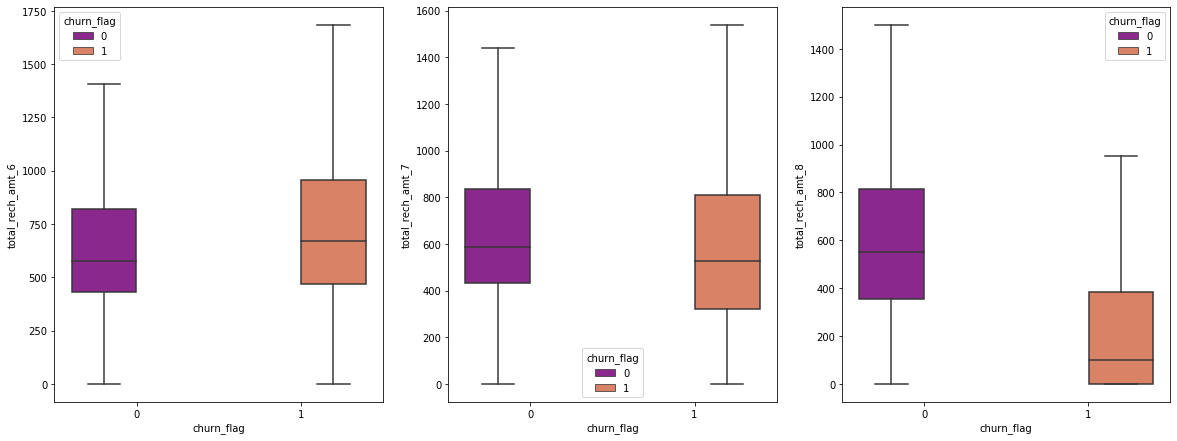

In [1367]:
# Ploting for total recharge amount:
plot_box_chart('total_rech_amt')
#can see a drop in rechargeable amount down in 8th month for churning customers

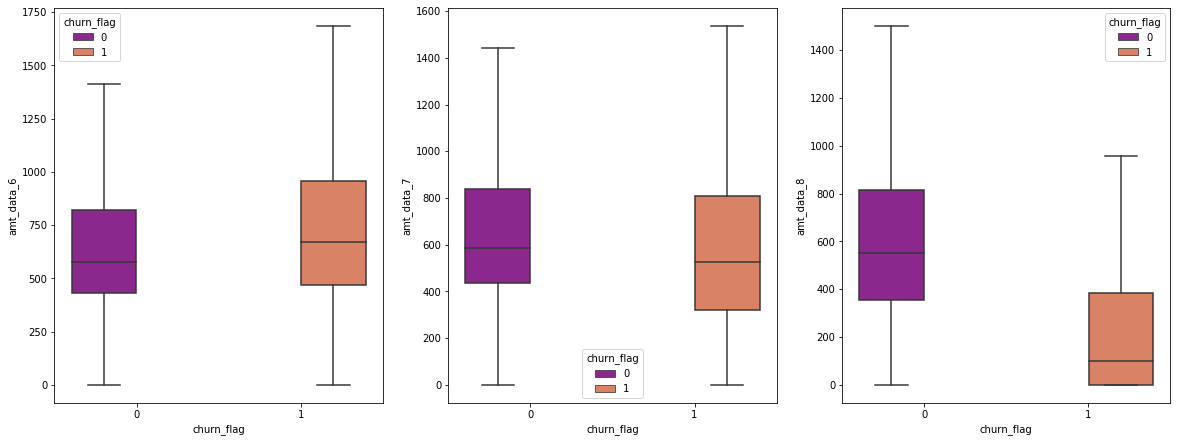

In [1368]:
# Ploting for total recharge amount for data:
plot_box_chart('amt_data')
#recharge amount drops in 8th month for churning customers

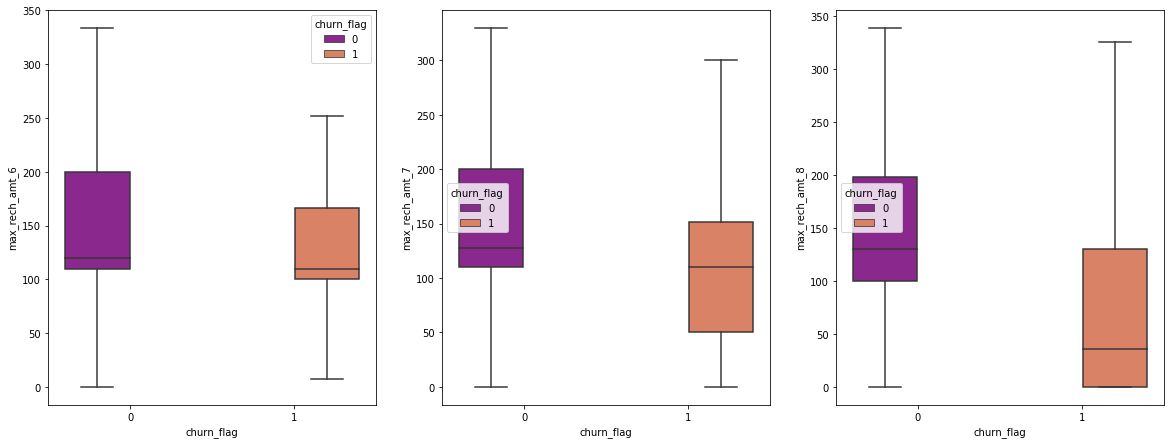

In [1369]:
# Ploting for total recharge amount for data:
plot_box_chart('max_rech_amt')
#Max recharge amount drops in 8th month for churning customers

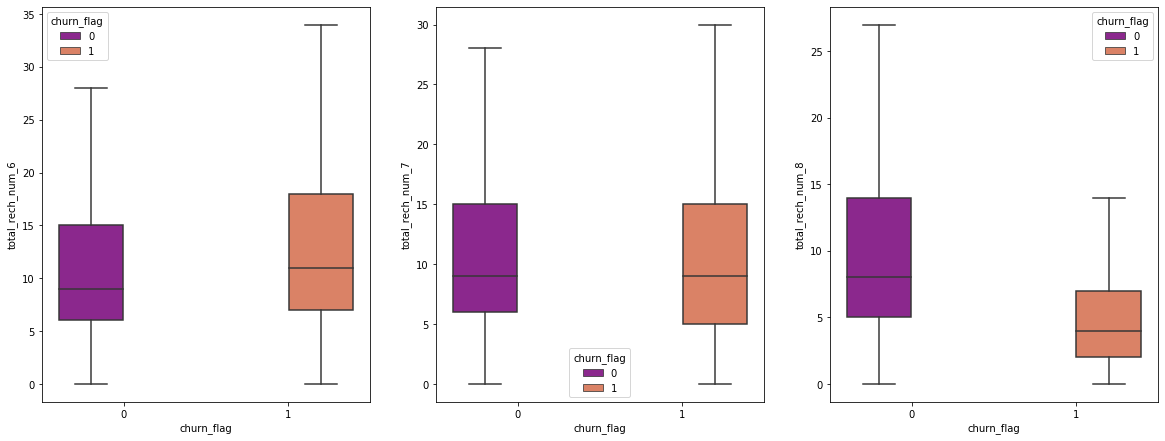

In [1370]:
# Ploting for Total recharge for Number:
plot_box_chart('total_rech_num')
#total recharge number drops in 8th month for churning customers

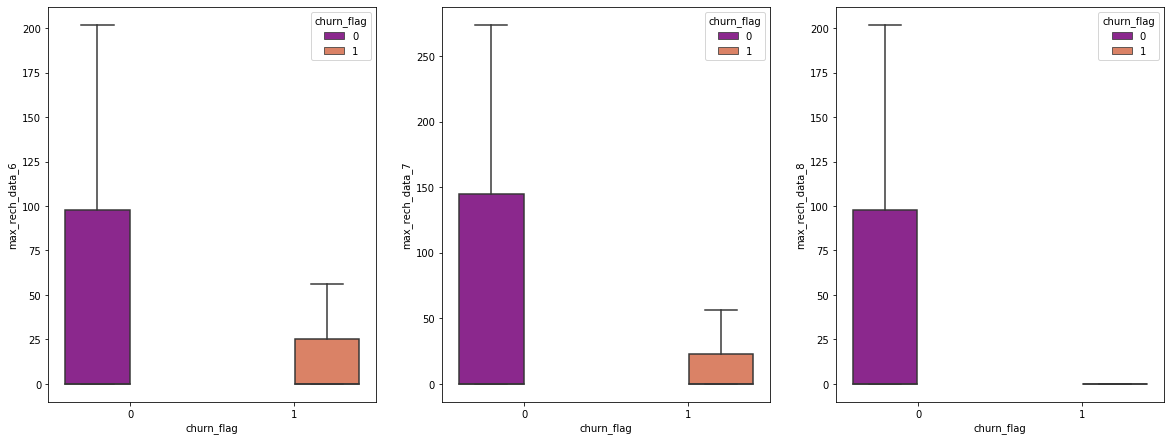

In [1371]:
# Ploting for maximum recharge for data:
plot_box_chart('max_rech_data')
#recharge data is almost going to nill in 8th month for churning customers

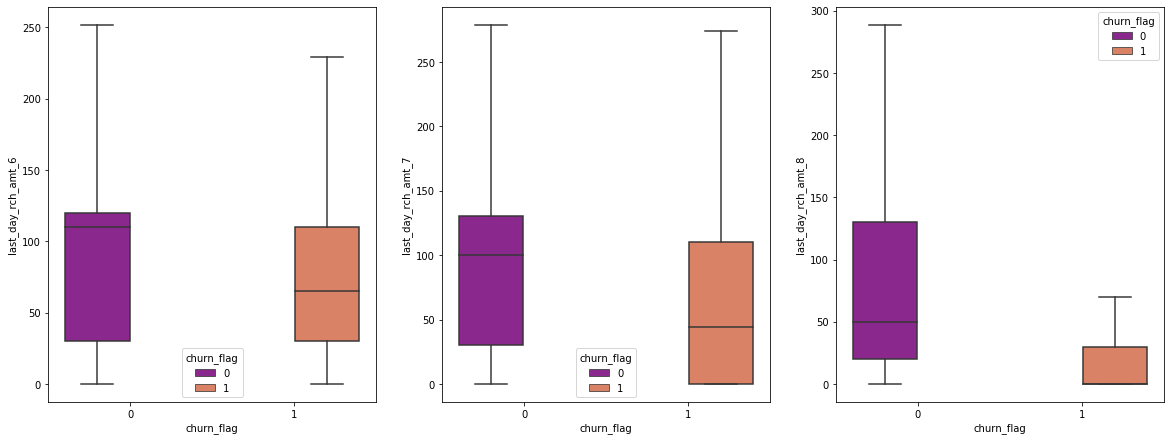

In [1372]:
# Ploting for last day recharge amount:
plot_box_chart('last_day_rch_amt')

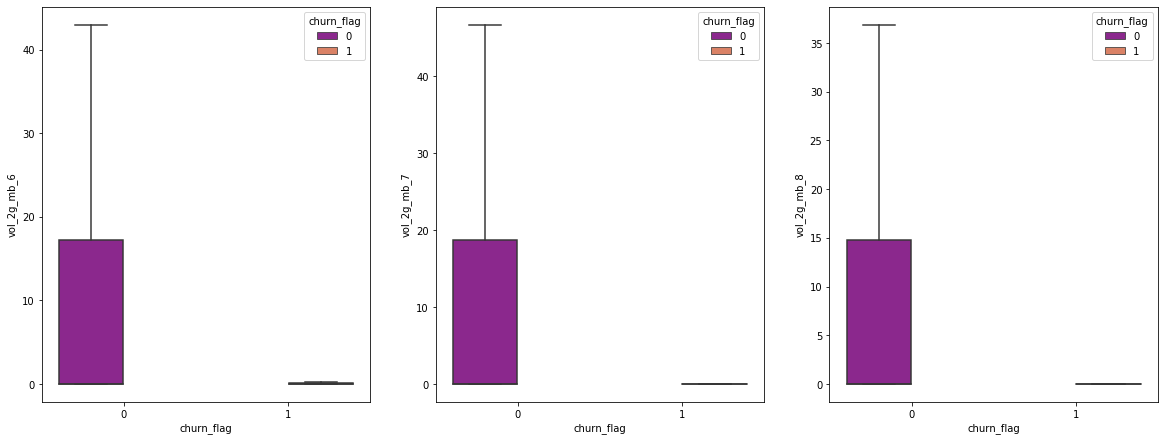

In [1373]:
# Ploting for volume of 2G and 3G usage columns:
plot_box_chart('vol_2g_mb')

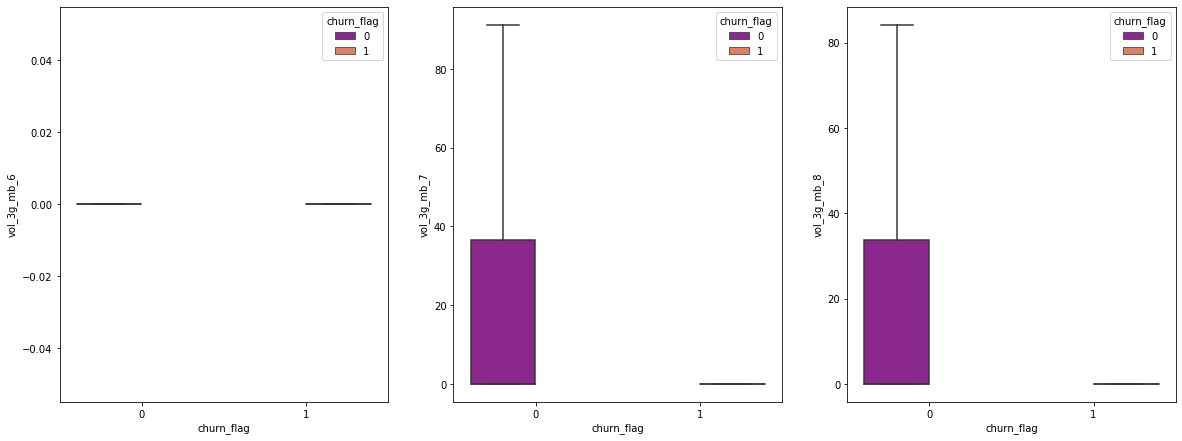

In [1374]:
plot_box_chart('vol_3g_mb')

In [1375]:
mou_og_cols6 = data_filtered.columns[data_filtered.columns.str.contains('.*_og_.*mou_6',regex=True)]

In [1376]:
def heatmap(x,y,dataframe):
    plt.figure(figsize=(x,y))
    sns.heatmap(dataframe.corr(),cmap="OrRd",annot=True)
    plt.show()

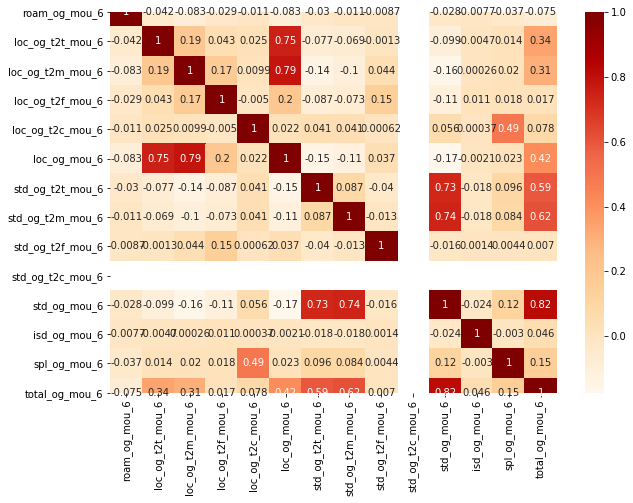

In [1377]:
heatmap(10, 7,data_filtered.filter(mou_og_cols6))

In [1378]:
print(data_filtered.loc[8,'total_og_mou_6'],"==",data_filtered.loc[8,['loc_og_mou_6','std_og_mou_6','spl_og_mou_6','isd_og_mou_6','og_others_6']].sum())
print(data_filtered.loc[8,'std_og_mou_6'],"==",data_filtered.loc[8,['std_og_t2m_mou_6','std_og_t2t_mou_6','std_og_t2f_mou_6','std_og_loc_mou_6']].sum())
print(data_filtered.loc[8,'loc_og_mou_6'],"==",data_filtered.loc[8,['loc_og_t2m_mou_6','loc_og_t2t_mou_6','loc_og_t2f_mou_6','loc_og_2tc_mou_6']].sum())

337.86 == 337.84999999999997
274.21 == 274.20000000000005
63.64 == 63.64


In [1379]:
list_total_og_cols = data_filtered.columns[data_filtered.columns.str.contains('total_og_mou|std_og_mou|loc_og_mou',regex=True)]
data_filtered.drop(list_total_og_cols,axis=1,inplace=True)
print("Columns dropped - ")
print(list_total_og_cols.tolist())

Columns dropped - 
['loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8']


In [1380]:
mou_ic_cols6 = data_filtered.columns[data_filtered.columns.str.contains('.*_ic_.*mou_6',regex=True)]

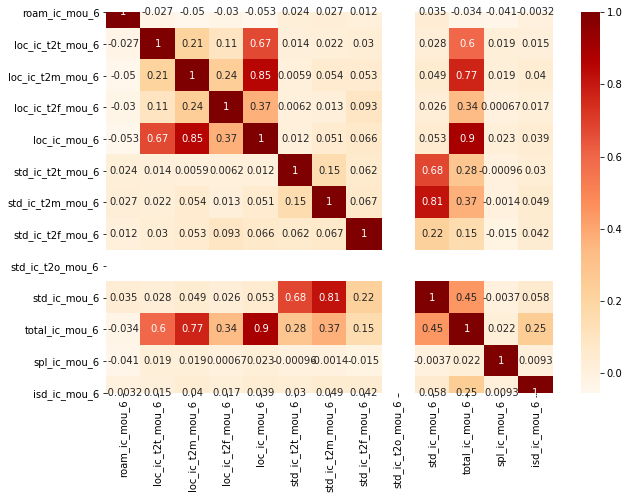

In [1381]:
heatmap(10,7,data_filtered.filter(mou_ic_cols6))

In [1382]:
print(data_filtered.loc[21,'total_ic_mou_6'],"==",data_filtered.loc[21,['loc_ic_mou_6','roam_ic_mou_6','isd_ic_mou_6','spl_ic_mou_6','std_ic_mou_6']].sum())
print(data_filtered.loc[21,'loc_ic_mou_6'],"==",data_filtered.loc[21,['loc_ic_t2t_mou_6','loc_ic_t2m_mou_6','loc_ic_t2f_mou_6','loc_ic_t2c_mou_6']].sum())
print(data_filtered.loc[21,'std_ic_mou_6'],"==",data_filtered.loc[21,['std_ic_t2t_mou_6','std_ic_t2m_mou_6','std_ic_t2f_mou_6','std_ic_t2c_mou_6']].sum())

392.69 == 392.68999999999994
350.78 == 350.76
41.91 == 41.9


In [1383]:
list_total_ic_cols = data_filtered.columns[data_filtered.columns.str.contains('total_ic_mou|std_ic_mou|loc_ic_mou',regex=True)]
data_filtered.drop(list_total_ic_cols,axis=1,inplace=True)
print("Columns dropped - ")
list_total_ic_cols.tolist()

Columns dropped - 


['loc_ic_mou_6',
 'loc_ic_mou_7',
 'loc_ic_mou_8',
 'std_ic_mou_6',
 'std_ic_mou_7',
 'std_ic_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8']

In [1384]:
data_filtered.drop('avg_amt_data_6_7',axis=1,inplace=True)

In [1385]:
col_list = data_filtered.filter(regex='_6|_7').columns.str[:-2]
for idx, col in enumerate(col_list.unique()):
    print(col)
    avg_col_name = "avg_"+col+"_av67"
    col_6 = col+"_6"
    col_7 = col+"_7"
    data_filtered[avg_col_name] = (data_filtered[col_6]  + data_filtered[col_7])/ 2

arpu
onnet_mou
offnet_mou
roam_ic_mou
roam_og_mou
loc_og_t2t_mou
loc_og_t2m_mou
loc_og_t2f_mou
loc_og_t2c_mou
std_og_t2t_mou
std_og_t2m_mou
std_og_t2f_mou
std_og_t2c_mou
isd_og_mou
spl_og_mou
og_others
loc_ic_t2t_mou
loc_ic_t2m_mou
loc_ic_t2f_mou
std_ic_t2t_mou
std_ic_t2m_mou
std_ic_t2f_mou
std_ic_t2o_mou
spl_ic_mou
isd_ic_mou
ic_others
total_rech_num
total_rech_amt
max_rech_amt
last_day_rch_amt
total_rech_data
max_rech_data
count_rech_2g
count_rech_3g
av_rech_amt_data
vol_2g_mb
vol_3g_mb
arpu_3g
arpu_2g
night_pck_user
monthly_2g
sachet_2g
monthly_3g
sachet_3g
fb_user
vbc_3g
amt_data
days_since_recharge


In [1386]:
col_list_to_drop = data_filtered.filter(regex='_6|_7')
data_filtered.drop(col_list_to_drop,axis=1,inplace=True)
print (data_filtered.shape)

(30019, 102)


In [1387]:
#SPLITTING DATA SET
# Putting feature variable to X
from sklearn.model_selection import train_test_split

X = data_filtered.drop(['churn_flag'],axis=1)

# Putting response variable to y
y = data_filtered['churn_flag']
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.7,test_size=0.3, random_state=100)
print ("Shape of Train dataset",X_train.shape, y_train.shape)
print ("Shape of Test dataset",X_test.shape, y_test.shape)


Shape of Train dataset (21013, 101) (21013,)
Shape of Test dataset (9006, 101) (9006,)


In [1388]:
#TREATING CLASS IMBALANCE
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))
sm =  SMOTE(random_state = 27)
X_train, y_train = sm.fit_sample(X_train, y_train.ravel()) 
  
print('After OverSampling, the shape of train_X: {}'.format(X_train.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train.shape)) 

print("After OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train == 0))) 


Before OverSampling, counts of label '1': 2120
Before OverSampling, counts of label '0': 18893 

After OverSampling, the shape of train_X: (37786, 101)
After OverSampling, the shape of train_y: (37786,) 

After OverSampling, counts of label '1': 18893
After OverSampling, counts of label '0': 18893


In [1389]:
scaler = StandardScaler()
scaler.fit(X_train) 

train_after_scaling = scaler.transform(X_train)
test_after_scaling = scaler.transform(X_test)

In [1390]:
logreg = LogisticRegression(solver = 'lbfgs')
gridSearchForLR(logreg,train_after_scaling,y_train)
#grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
#logreg_cv=GridSearchCV(logreg,grid,cv=10)
#logreg_cv.fit(train_after_scaling, y_train)

#print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
#print("accuracy :",logreg_cv.best_score_)


tuned hpyerparameters :(best parameters)  {'C': 1000.0, 'penalty': 'l2'}
accuracy : 0.8683121919621838


In [1391]:
logreg_afterTuning=LogisticRegression(C=1000,penalty="l2")
logreg_afterTuning.fit(train_after_scaling, y_train)

LogisticRegression(C=1000)

In [1392]:
y_pred = logreg_afterTuning.predict(test_after_scaling)

In [1393]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [1394]:
y_pred.size

9006

In [1395]:
y_test

22519    0
13786    0
10796    0
28647    0
591      0
        ..
16521    1
27496    0
17815    0
6607     0
20077    0
Name: churn_flag, Length: 9006, dtype: int32

In [1396]:
printingMSEandRsquare(y_test, y_pred)

0.14534754608039085
-0.5756118619421331


In [1397]:
confusion_matrix_1 = confusion_matrix(y_test, y_pred)
print(confusion_matrix_1)


[[6991 1089]
 [ 220  706]]


In [1398]:
y_pred_default = y_pred
printingConfusionMetricDetails(confusion_matrix_1)

Acuracy Score 0.8546524539196092
Sensitivity:  0.7624190064794817
Specificity:  0.8652227722772278
false postive rate:  0.13477722772277229
positive predictive value:  0.3933147632311978
Negative predictive value:  0.9694910553321314
Misclassification Rate:  0.14534754608039085


In [1399]:
#Based on stats above lets take a look at imp features for both Logestic and RF
#importance = logreg_afterTuning.coef_[0]
#impFeaturesforModels(importance)

In [1400]:
x = train_after_scaling

In [1401]:
##PCA FOR LR

In [1402]:
from sklearn.decomposition import PCA

In [1403]:
pca = PCA(random_state=42)

In [1404]:
pca.fit(x)

PCA(random_state=42)

In [1405]:
pca.components_

array([[-1.59096989e-19, -2.22044605e-16, -1.11022302e-16, ...,
         1.48073321e-01,  9.39905384e-02, -1.33301617e-02],
       [ 1.52471030e-19, -0.00000000e+00, -1.11022302e-16, ...,
        -3.61834601e-02,  2.58967737e-01, -2.13689738e-03],
       [-1.18707100e-19, -8.32667268e-17,  2.36789754e-16, ...,
        -6.67534544e-02,  4.88335363e-03, -2.88783092e-02],
       ...,
       [ 0.00000000e+00,  6.71266957e-01, -6.32859876e-02, ...,
         1.38777878e-16,  2.62326245e-03, -1.38777878e-17],
       [ 9.99999957e-01,  8.63997937e-05,  4.24702482e-05, ...,
         1.94817578e-20,  5.81946784e-06,  2.20228566e-19],
       [-0.00000000e+00, -2.87680277e-01,  1.42639190e-02, ...,
         2.77555756e-17, -1.02559352e-01, -0.00000000e+00]])

In [1406]:
pca.explained_variance_ratio_

array([1.53144961e-01, 8.01914170e-02, 6.24312109e-02, 4.88506666e-02,
       3.57087057e-02, 3.27728087e-02, 2.97612487e-02, 2.87129544e-02,
       2.59354056e-02, 2.45610044e-02, 2.20714891e-02, 2.14776848e-02,
       2.02639011e-02, 1.90812180e-02, 1.80370333e-02, 1.77919674e-02,
       1.73451162e-02, 1.61139911e-02, 1.50842592e-02, 1.35666070e-02,
       1.32816087e-02, 1.31110084e-02, 1.24457936e-02, 1.22087361e-02,
       1.20707307e-02, 1.18768989e-02, 1.14065642e-02, 1.09950620e-02,
       1.04232142e-02, 9.80167919e-03, 9.29514290e-03, 8.95333731e-03,
       8.85433784e-03, 8.25697557e-03, 8.18399180e-03, 7.75987950e-03,
       7.54319331e-03, 7.47082209e-03, 7.28505378e-03, 6.73803567e-03,
       6.64444613e-03, 6.42198340e-03, 5.99447204e-03, 5.14809349e-03,
       4.74604342e-03, 4.44448538e-03, 4.30053351e-03, 3.95821129e-03,
       3.85246487e-03, 3.60812972e-03, 3.47565808e-03, 3.36659235e-03,
       3.11200239e-03, 2.96084828e-03, 2.88561889e-03, 2.79795742e-03,
      

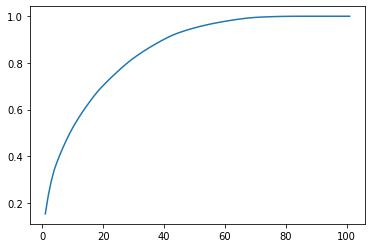

In [1407]:
#60 components explain close to 90 percent of variace
import matplotlib.pyplot as plt
var_cumu = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1,len(var_cumu)+1), var_cumu)

In [1408]:
#pc2 = PCA(n_components=75, random_state=42)
from sklearn.decomposition import IncrementalPCA

pcaFinal = IncrementalPCA(n_components=60)
train_pca = pcaFinal.fit_transform(train_after_scaling)
train_pca.shape

(37786, 60)

In [1409]:
#Applying selected components to the test data
test_pca = pcaFinal.fit_transform(test_after_scaling)
test_pca.shape 


(9006, 60)

In [1410]:
train_pca

array([[-1.80528856e+00,  9.06014777e-01, -5.49090018e-01, ...,
         1.87650261e-01, -1.40563992e-01, -1.60414705e-01],
       [ 3.24320307e+00, -4.09518198e+00,  8.30731571e+00, ...,
        -2.43101382e-01,  3.17392954e-02, -2.28053433e-01],
       [-1.19633431e+00, -1.55628539e+00, -2.19323497e-01, ...,
        -5.13333016e-01, -8.78842054e-02,  1.67122703e-01],
       ...,
       [-2.67916177e+00, -2.57447056e-02, -5.05132956e-01, ...,
         1.01861288e-01, -3.24694486e-02,  1.14302933e-01],
       [-1.27311108e+00, -1.29553369e-01, -4.59620459e-01, ...,
         1.94598572e-01, -1.21296545e-01,  5.90306175e-03],
       [-8.81743451e-01, -1.06073650e+00,  1.50780650e+00, ...,
        -1.53605210e-01,  3.48696905e-01, -1.99737305e-01]])

In [1411]:
y_train.shape

(37786,)

In [1412]:
logRegwithPCA = LogisticRegression(solver = 'lbfgs')
gridSearchForLR(logRegwithPCA,train_pca,y_train)
#logRegwithPCA.fit(train_pca, y_train)

tuned hpyerparameters :(best parameters)  {'C': 10.0, 'penalty': 'l2'}
accuracy : 0.8329276499604751


In [1413]:
logRegwithPCA_afterTuning=LogisticRegression(C=10,penalty="l2")
logRegwithPCA_afterTuning.fit(train_pca, y_train)

LogisticRegression(C=10)

In [1414]:
y_pred = logRegwithPCA_afterTuning.predict(test_pca)


In [1415]:
y_pred

array([0, 1, 1, ..., 1, 1, 0])

In [1416]:
y_pred.size

9006

In [1417]:
y_test

22519    0
13786    0
10796    0
28647    0
591      0
        ..
16521    1
27496    0
17815    0
6607     0
20077    0
Name: churn_flag, Length: 9006, dtype: int32

In [1418]:
printingMSEandRsquare(y_test, y_pred)

0.4978902953586498
-4.397283108440432


In [1419]:
confusion_matrix2 = confusion_matrix(y_test, y_pred)
print(confusion_matrix2)
y_pred_default = y_pred

[[3928 4152]
 [ 332  594]]


In [1420]:
printingConfusionMetricDetails(confusion_matrix2)

Acuracy Score 0.5021097046413502
Sensitivity:  0.6414686825053996
Specificity:  0.4861386138613861
false postive rate:  0.5138613861386139
positive predictive value:  0.12515802781289506
Negative predictive value:  0.9220657276995305
Misclassification Rate:  0.4978902953586498


In [1421]:
#lets take a look at imp features for both Logestic and RF
#importance = logRegwithPCA_afterTuning.coef_[0]
#impFeaturesforModels(importance)

In [1422]:
# Decision tree after Logistic regression

In [1423]:

# Importing decision tree classifier from sklearn library

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5, class_weight='balanced')
dt_default.fit(train_pca,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5)

In [1424]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_default.predict(test_pca)

# # Printing classification report
# print(classification_report(y_test, y_pred_default))

# from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
print(classification_report(y_test,y_pred_default))
print(confusion_matrix(y_test,y_pred_default))
print('Acuracy Score', accuracy_score(y_test,y_pred_default))

              precision    recall  f1-score   support

           0       0.93      0.51      0.66      8080
           1       0.14      0.68      0.23       926

    accuracy                           0.53      9006
   macro avg       0.54      0.60      0.44      9006
weighted avg       0.85      0.53      0.62      9006

[[4131 3949]
 [ 295  631]]
Acuracy Score 0.528758605374195


In [1425]:
confusion_tree = confusion_matrix(y_test,y_pred_default)
printingConfusionMetricDetails(confusion_tree)

Acuracy Score 0.528758605374195
Sensitivity:  0.6814254859611231
Specificity:  0.5112623762376237
false postive rate:  0.4887376237623762
positive predictive value:  0.13777292576419214
Negative predictive value:  0.9333483958427474
Misclassification Rate:  0.471241394625805


In [1426]:
########## lets tune hyper parameters
# GridSearchCV to find optimal max_depth

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}


In [1427]:
# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", class_weight='balanced', random_state = 100)


In [1428]:
# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True,  n_jobs = -1)


In [1429]:
tree.fit(train_pca,y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=100),
             n_jobs=-1, param_grid={'max_depth': range(1, 40)},
             return_train_score=True, scoring='accuracy')

In [1430]:
y_train.shape

(37786,)

In [1431]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.623044,0.028659,0.005598,0.001959,1,{'max_depth': 1},0.669092,0.681090,0.676988,0.671298,...,0.675753,0.004793,39,0.678378,0.675312,0.676337,0.676999,0.674716,0.676348,0.001287
1,1.080528,0.030706,0.003999,0.000003,2,{'max_depth': 2},0.713416,0.718274,0.714702,0.671298,...,0.707590,0.018310,38,0.718572,0.717291,0.717953,0.676999,0.716696,0.709502,0.016264
2,1.815541,0.118170,0.008796,0.003920,3,{'max_depth': 3},0.754962,0.764589,0.763134,0.743814,...,0.758561,0.008339,37,0.764391,0.762645,0.764001,0.748718,0.763770,0.760705,0.006022
3,2.318795,0.095213,0.006014,0.002553,4,{'max_depth': 4},0.770839,0.781792,0.773984,0.742623,...,0.770047,0.014325,36,0.784901,0.777432,0.781170,0.753416,0.776837,0.774751,0.011054
4,2.908168,0.123417,0.004800,0.001600,5,{'max_depth': 5},0.788568,0.791319,0.791716,0.778484,...,0.789234,0.005890,35,0.802435,0.796751,0.799596,0.793212,0.794667,0.797332,0.003334


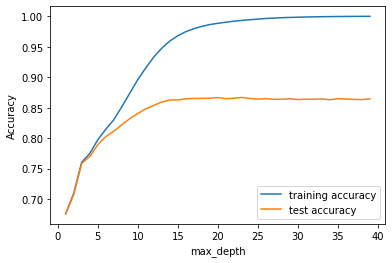

In [1432]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# seems 15 or 20 Max depth

In [1433]:
## Lets tune min sample leaf
# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini",class_weight='balanced',random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True , n_jobs = -1)
tree.fit(train_pca,y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=100),
             n_jobs=-1, param_grid={'min_samples_leaf': range(5, 200, 20)},
             return_train_score=True, scoring='accuracy')

In [1434]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,6.311773,0.158494,0.008395,0.002798,5,{'min_samples_leaf': 5},0.845991,0.868334,0.862512,0.850337,...,0.857170,0.008088,1,0.955836,0.954812,0.956433,0.956267,0.956929,0.956055,0.000713
1,5.897812,0.946718,0.007396,0.000800,25,{'min_samples_leaf': 25},0.829849,0.840413,0.840942,0.838163,...,0.838247,0.004373,2,0.885900,0.884945,0.885077,0.885441,0.888915,0.886056,0.001467
2,7.009492,0.538203,0.008795,0.002399,45,{'min_samples_leaf': 45},0.822307,0.831282,0.834590,0.832076,...,0.830996,0.004551,3,0.865191,0.863045,0.864633,0.864997,0.862913,0.864156,0.000978
3,6.706239,0.333759,0.030183,0.020378,65,{'min_samples_leaf': 65},0.819132,0.825592,0.826121,0.825592,...,0.825226,0.003411,4,0.854076,0.849747,0.852294,0.852559,0.849912,0.851718,0.001658
4,6.709166,0.668928,0.011994,0.006030,85,{'min_samples_leaf': 85},0.806827,0.821490,0.825460,0.821622,...,0.820251,0.006959,5,0.848187,0.841245,0.841377,0.841080,0.841411,0.842660,0.002766


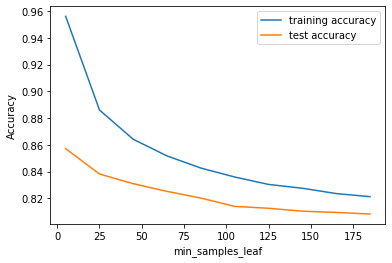

In [1435]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#seems 5 to 75

In [1436]:
## Tuning min sample split
# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini",class_weight='balanced', random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True,  n_jobs = -1)
tree.fit(train_pca,y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=100),
             n_jobs=-1, param_grid={'min_samples_split': range(5, 200, 20)},
             return_train_score=True, scoring='accuracy')

In [1437]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,11.970632,0.453528,0.008397,0.000489,5,{'min_samples_split': 5},0.858296,0.870187,0.867275,0.851396,...,0.861960,0.006655,1,0.992887,0.992325,0.993285,0.992788,0.992491,0.992755,0.000333
1,12.610495,0.419410,0.012794,0.004913,25,{'min_samples_split': 25},0.846388,0.862247,0.858012,0.840678,...,0.852353,0.007825,2,0.950212,0.950412,0.950379,0.949552,0.953455,0.950802,0.001363
2,12.281874,0.291409,0.016709,0.014559,45,{'min_samples_split': 45},0.834215,0.854837,0.851528,0.838428,...,0.845869,0.008045,3,0.926856,0.926660,0.927751,0.924410,0.929439,0.927023,0.001634
3,14.144639,1.364097,0.026424,0.014404,65,{'min_samples_split': 65},0.829452,0.847162,0.848617,0.834326,...,0.840708,0.007515,4,0.914748,0.910020,0.912005,0.904793,0.912964,0.910906,0.003416
4,14.310688,2.569539,0.024187,0.020996,85,{'min_samples_split': 85},0.825351,0.845044,0.844780,0.829694,...,0.836157,0.007899,5,0.901780,0.900526,0.900063,0.891726,0.899070,0.898633,0.003562


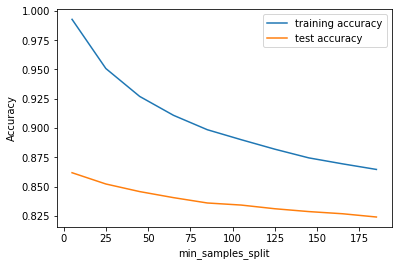

In [1438]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#seems 25

In [1439]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(10, 20, 5),
    'min_samples_leaf': range(5, 75, 20),
    'min_samples_split': range(5, 75, 20),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier(class_weight='balanced')
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, refit='recall_score',
                          cv = n_folds, verbose = 1, n_jobs = -1)

# Fit the grid search to the data
grid_search.fit(train_pca,y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed: 10.9min finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(10, 20, 5),
                         'min_samples_leaf': range(5, 75, 20),
                         'min_samples_split': range(5, 75, 20)},
             refit='recall_score', verbose=1)

In [1440]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,13.467409,0.358111,0.017990,0.008457,entropy,10,5,5,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.824292,0.836178,0.830091,0.827577,0.842265,0.832081,0.006410,20
1,13.499375,0.868322,0.008595,0.003771,entropy,10,5,25,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.823101,0.835252,0.829033,0.825063,0.839884,0.830467,0.006278,30
2,11.955112,2.062718,0.008795,0.002925,entropy,10,5,45,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.822704,0.834590,0.828636,0.824269,0.837369,0.829514,0.005694,34
3,9.448200,0.307426,0.006996,0.000893,entropy,10,5,65,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.821381,0.832606,0.828106,0.824137,0.836840,0.828614,0.005590,35
4,9.367073,0.246790,0.008795,0.003247,entropy,10,25,5,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.817280,0.831150,0.827709,0.823343,0.837369,0.827370,0.006818,39


In [1441]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.8575929857314802
DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=15, min_samples_leaf=5, min_samples_split=5)


In [1442]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini",class_weight='balanced',
                                  random_state = 100,
                                  max_depth=15, 
                                  min_samples_leaf=5,
                                  min_samples_split=5)
clf_gini.fit(train_pca,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=15,
                       min_samples_leaf=5, min_samples_split=5,
                       random_state=100)

In [1443]:
y_pred_default = clf_gini.predict(test_pca)
confusion_tree_hyper=confusion_matrix(y_test,y_pred_default)
confusion_tree_hyper

array([[5268, 2812],
       [ 638,  288]], dtype=int64)

In [1444]:
printingConfusionMetricDetails(confusion_tree_hyper)

Acuracy Score 0.6169220519653564
Sensitivity:  0.31101511879049676
Specificity:  0.651980198019802
false postive rate:  0.348019801980198
positive predictive value:  0.09290322580645162
Negative predictive value:  0.8919742634608873
Misclassification Rate:  0.38307794803464357


In [1445]:
# Random Forest

In [1446]:
# Running the random forest with default parameters.
rfc = RandomForestClassifier(class_weight='balanced')

# fit
rfc.fit(train_pca,y_train)

# Making predictions
y_pred_default = rfc.predict(test_pca)

In [1447]:
confusion_rf=confusion_matrix(y_test,y_pred_default)
confusion_rf

array([[7495,  585],
       [ 869,   57]], dtype=int64)

In [1448]:
printingConfusionMetricDetails(confusion_tree_hyper)

Acuracy Score 0.8385520763935155
Sensitivity:  0.31101511879049676
Specificity:  0.651980198019802
false postive rate:  0.348019801980198
positive predictive value:  0.09290322580645162
Negative predictive value:  0.8919742634608873
Misclassification Rate:  0.38307794803464357


In [1449]:
#Lets do some hyper parameter tuning  for RF

# GridSearchCV to find optimal n_estimators

# specify number of folds for k-fold CV
n_folds = 5
# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf_with_pca = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf_with_pca = GridSearchCV(rf_with_pca, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", n_jobs=-1, return_train_score=True)
rf_with_pca.fit(train_pca, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1, param_grid={'max_depth': range(2, 20, 5)},
             return_train_score=True, scoring='accuracy')

In [1450]:
# scores of GridSearch CV
scores = rf_with_pca.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,15.382697,1.248283,0.463248,0.165981,2,{'max_depth': 2},0.777322,0.789599,0.785365,0.789467,...,0.786323,0.004798,4,0.793304,0.783916,0.789705,0.791293,0.785074,0.788659,0.003604
1,36.281290,1.024229,0.236665,0.066468,7,{'max_depth': 7},0.840169,0.849940,0.851661,0.847162,...,0.848013,0.004219,3,0.865191,0.863906,0.863509,0.861921,0.860531,0.863011,0.001621
2,62.496216,3.835948,0.423811,0.213432,12,{'max_depth': 12},0.907383,0.911737,0.913193,0.909620,...,0.911131,0.002352,2,0.959607,0.958649,0.959873,0.958715,0.958616,0.959092,0.000537
3,62.364285,7.288529,0.329462,0.095831,17,{'max_depth': 17},0.933448,0.931984,0.934365,0.935556,...,0.934658,0.002013,1,0.986999,0.987264,0.987098,0.988025,0.987595,0.987396,0.000374


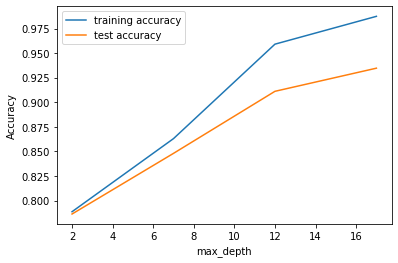

In [1451]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#seems 11 to 13

In [1452]:
# Tuning n_estimators
# GridSearchCV to find optimal n_estimators

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=10, class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", n_jobs=-1, verbose = 1, return_train_score=True)
rf.fit(train_pca, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 25.2min finished


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              max_depth=10),
             n_jobs=-1, param_grid={'n_estimators': range(100, 1500, 400)},
             return_train_score=True, scoring='accuracy', verbose=1)

In [1453]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,40.980079,5.171923,0.214077,0.016942,100,{'n_estimators': 100},0.881979,0.886198,0.888448,0.889374,...,0.887181,0.002893,4,0.926492,0.922293,0.923848,0.925899,0.922095,0.924125,0.001806
1,154.568027,1.369631,1.036692,0.046794,500,{'n_estimators': 500},0.881715,0.887918,0.891756,0.887125,...,0.888054,0.003701,3,0.926360,0.924840,0.924973,0.926031,0.924675,0.925376,0.000684
2,332.717257,50.362966,2.423858,0.207599,900,{'n_estimators': 900},0.882112,0.888448,0.890433,0.887786,...,0.888345,0.003598,1,0.927054,0.924344,0.924940,0.925932,0.925006,0.925455,0.000947
3,527.406619,68.487125,2.349472,0.603464,1300,{'n_estimators': 1300},0.882641,0.887522,0.890036,0.888051,...,0.888186,0.003312,2,0.926591,0.924245,0.925237,0.926461,0.925006,0.925508,0.000895


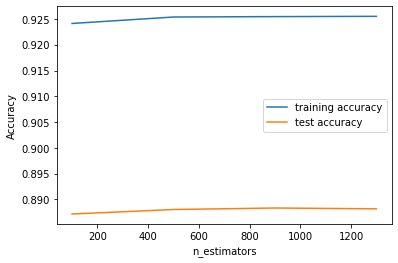

In [1454]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [1455]:
# GridSearchCV to find optimal max_features
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
rf = RandomForestClassifier(max_depth=10,class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", n_jobs=-1, return_train_score=True, verbose = 1)
rf.fit(train_pca, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  6.8min finished


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              max_depth=10),
             n_jobs=-1, param_grid={'max_features': [4, 8, 14, 20, 24]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [1456]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,21.782649,0.670829,0.207949,0.022050,4,{'max_features': 4},0.875364,0.879582,0.884478,0.879185,...,0.881200,0.004238,5,0.918652,0.915082,0.917066,0.916703,0.917232,0.916947,0.001144
1,37.552428,2.089641,0.199951,0.009796,8,{'max_features': 8},0.883038,0.886992,0.887918,0.886066,...,0.887683,0.003738,4,0.928378,0.924576,0.924146,0.925502,0.927057,0.925932,0.001579
2,59.811253,0.485196,0.206348,0.031139,14,{'max_features': 14},0.887536,0.894403,0.895726,0.894270,...,0.894220,0.003780,3,0.931487,0.929637,0.930960,0.932681,0.930464,0.931046,0.001020
3,84.149067,0.385258,0.193553,0.014219,20,{'max_features': 20},0.890976,0.892947,0.897314,0.891888,...,0.894352,0.003052,2,0.934928,0.931820,0.935129,0.935790,0.931622,0.933858,0.001769
4,96.427461,8.260326,0.160873,0.026805,24,{'max_features': 24},0.895343,0.894535,0.898372,0.893873,...,0.896337,0.002230,1,0.938732,0.933772,0.935790,0.935956,0.934467,0.935743,0.001703


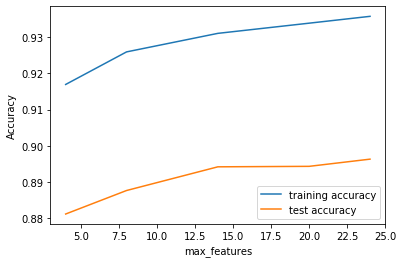

In [1457]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# 8 to 12

In [1458]:
# GridSearchCV to find optimal min_samples_leaf

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", n_jobs=-1, return_train_score=True, verbose = 1)
rf.fit(train_pca, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  4.0min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1, param_grid={'min_samples_leaf': range(100, 400, 50)},
             return_train_score=True, scoring='accuracy', verbose=1)

In [1459]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,36.550281,3.300672,0.352708,0.091591,100,{'min_samples_leaf': 100},0.832231,0.849543,0.850867,0.844780,...,0.846266,0.007610,1,0.862280,0.858811,0.858877,0.860267,0.859340,0.859915,0.001292
1,34.711392,7.193279,0.172758,0.007754,150,{'min_samples_leaf': 150},0.825615,0.842398,0.843986,0.836972,...,0.838618,0.007002,2,0.850536,0.848192,0.848027,0.848457,0.847100,0.848462,0.001133
2,24.819144,0.338200,0.194933,0.014859,200,{'min_samples_leaf': 200},0.819794,0.840810,0.836708,0.831679,...,0.833404,0.007421,3,0.843556,0.841411,0.840021,0.841907,0.840517,0.841482,0.001229
3,34.581918,5.324445,0.197549,0.040195,250,{'min_samples_leaf': 250},0.818603,0.836311,0.828768,0.830621,...,0.829858,0.006267,4,0.837005,0.836018,0.836184,0.838665,0.836283,0.836831,0.000977
4,23.913973,1.052941,0.188754,0.021668,300,{'min_samples_leaf': 300},0.817015,0.834590,0.828106,0.822946,...,0.827158,0.006519,5,0.836807,0.832413,0.832016,0.832909,0.832909,0.833411,0.001731


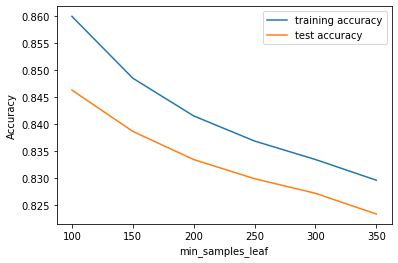

In [1460]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#seems 100 to 150

In [1461]:
# GridSearchCV to find optimal min_samples_split

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True, n_jobs=-1, verbose = 1)
rf.fit(train_pca, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  6.3min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1, param_grid={'min_samples_split': range(200, 500, 50)},
             return_train_score=True, scoring='accuracy', verbose=1)

In [1462]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,46.249416,1.387646,0.406264,0.043163,200,{'min_samples_split': 200},0.848505,0.867408,0.862644,0.860394,...,0.861007,0.006725,1,0.887091,0.883820,0.884052,0.884250,0.884846,0.884812,0.001189
1,47.336413,6.857733,0.369242,0.194149,250,{'min_samples_split': 250},0.839905,0.861188,0.858277,0.856821,...,0.855053,0.007704,2,0.877829,0.873565,0.874127,0.875583,0.874127,0.875046,0.001543
2,50.355042,2.624277,0.329381,0.069693,300,{'min_samples_split': 300},0.837788,0.857880,0.852852,0.850734,...,0.851718,0.007646,3,0.872602,0.866850,0.867114,0.869430,0.867611,0.868721,0.002139
3,53.481543,3.173881,0.264241,0.022319,350,{'min_samples_split': 350},0.833157,0.850337,0.850337,0.845706,...,0.846769,0.007331,4,0.865919,0.861722,0.861722,0.863839,0.862053,0.863051,0.001636
4,43.913416,0.347049,0.264864,0.014577,400,{'min_samples_split': 400},0.833422,0.849676,0.847294,0.846103,...,0.845102,0.005974,5,0.861651,0.855867,0.857951,0.859043,0.857289,0.858360,0.001941


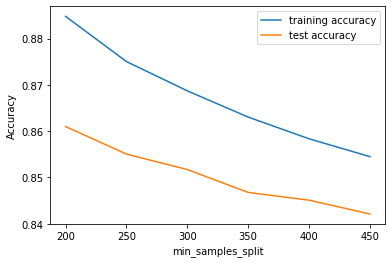

In [1463]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# 200 to 300

In [1464]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [11,14],
    'min_samples_leaf': range(100, 150, 50),
    'min_samples_split': range(200, 400, 100),
    'n_estimators': range(200, 600, 100), 
    'max_features': [8, 10, 12]
}
# Create a based model
rf = RandomForestClassifier(class_weight='balanced')

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,refit='recall_score' ,
                          cv = 5, n_jobs=-1, verbose = 1)

In [ ]:
# Fit the grid search to the data
grid_search.fit(train_pca, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 25.1min


In [ ]:
# printing the optimal accuracy score and hyperparameters
print('Accuracy got is',grid_search.best_score_,'using',grid_search.best_params_)

In [ ]:
# Model with Best Hyper Parameters
rfc_with_HyperParams = RandomForestClassifier(bootstrap=True, class_weight='balanced',
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=12,
                             n_estimators=200)

In [ ]:
rfc_with_HyperParams.fit(train_pca,y_train)

In [ ]:
# predict
y_pred_default = rfc_with_HyperParams.predict(test_pca)

In [ ]:
# Confusion Matrix
confusion_rf_hyper=confusion_matrix(y_test,y_pred_default)
confusion_rf_hyper

In [ ]:
printingConfusionMetricDetails(confusion_tree_hyper)

In [ ]:

#first logistic reg - accu - 86, Se - 76 , Spec - 86
# PCA - Logisc - acc-52, Sen - 66, Sepc - 50
# DT - first - Acc - 52, Sen -69 , Spec - 61
# DT - tuning - Acc - 62, Sen - 44, Spec - 63
# RF - - first - Acc  84, Sen - 44, Sepc - 64
# RF - post tuning - Acc - 63 Sen - 44, Sepc - 64
# 
# RF seems to have hte highest Accuracy post PCA

In [ ]:
##FEATURE SELECTION
#Based on stats above lets take a look at imp features for both Logestic and RF

In [ ]:
#Printing importance table for Logistic Regression
importance = logRegwithPCA_afterTuning.coef_[0]
impFeaturesforModels(importance)

In [ ]:
#Printing importance table for Random Forest
importance = rfc_with_HyperParams.feature_importances_
impFeaturesforModels(importance)
# let us use RF on full data set to get the important parameters